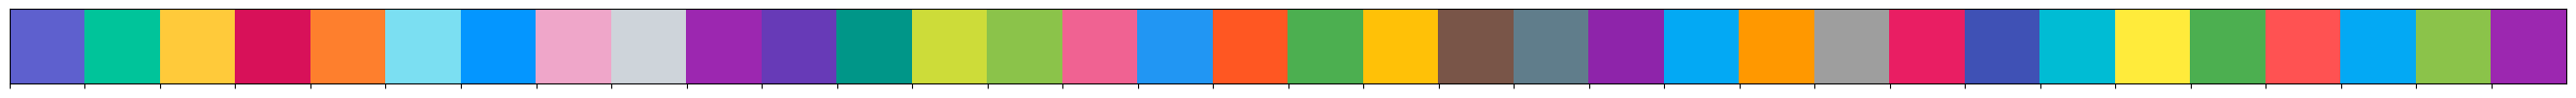

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import base as base
import functions as func
from datetime import datetime
import matplotlib
import os
from sklearn.metrics.pairwise import cosine_similarity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

In [2]:
# load umap 
save_to = "mouse_chip19894"
figure_save_to = f"{save_to}/connect_map/"
file_save_to = f"{save_to}/files"
base_path = "/media/kang/Seagate_External/temp_data/integrated/2023-09-16-efi-mouse-5plex-official/19894_pipeline/right_organoid"
acqm_path = f"{base_path}/zip_file"
connect_path = f"{base_path}/connectivity"
umap_file = "umap_with_recs_res1.5_loc"
# umap_df = pd.read_csv(f"{save_to}/files/{umap_file}.csv")
# # umap_df_added = pd.read_csv(f"{save_to}/files/{umap_file}_added.csv")
# unmap_file_path = f"{save_to}/files/{umap_file}_added.csv"
# umap_df_added = func.load_umap_df(unmap_file_path)
umap_conn_path = f"{save_to}/files/{umap_file}_added_conn.csv"
umap_df_conn = pd.read_csv(umap_conn_path)

In [3]:

for i in range(umap_df_conn.shape[0]):
    wf = umap_df_conn.iloc[i]["waveform"]
    neighbor_waveforms = umap_df_conn.iloc[i]["neighbor_waveforms"]
    neighbor_positions = umap_df_conn.iloc[i]["neighbor_positions"]
    connection = umap_df_conn.iloc[i]["connection"]
    float_strings = wf.strip('[]').split()     # convert the string respresentation to a list of strings
    # print(float_strings)
    float_neighbor_waveforms = neighbor_waveforms.strip('[]').split()     
    # print(float_neighbor_waveforms) 
    nei_wf = np.array([float(x.rstrip(',')) for x in float_neighbor_waveforms])
    # print(nei_wf)
    float_neighbor_positions = neighbor_positions.strip('[]').split()     
    nei_pos = np.array([float(x.rstrip(',')) for x in float_neighbor_positions])
    # Convert each float string to a float value
    float_wf = np.array([float(value) for value in float_strings])
    float_conn = connection.strip('[]').split()
    conn = np.array([float(x.rstrip(',')) for x in float_conn])

 
    umap_df_conn.at[i, "waveform"] = float_wf[:50]   # remove the last 2 values of the electrode position 
    umap_df_conn.at[i, "neighbor_waveforms"] = nei_wf
    umap_df_conn.at[i, "neighbor_positions"] = nei_pos
    umap_df_conn.at[i, "connection"] = conn

In [4]:
# df["channel_x"] = df["x"].astype(float)
# df["channel_y"] = df["y"].astype(float)
# #convert timestamp from string to datetime and float
umap_df_conn['timestamp'] = pd.to_datetime(umap_df_conn['timestamp'])
# #convert timestamp from string to datetime and float
# umap_df_added['timestamp'] = umap_df_added['timestamp'].astype('int64') / 1e6 #convert to milliseconds

# #Convert waveform from string to numpy array
# df['waveform'] = df['waveform'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
umap_df_conn['timestamp']

0      2023-09-16 17:13:32
1      2023-09-16 17:13:32
2      2023-09-16 17:13:32
3      2023-09-16 17:13:32
4      2023-09-16 17:13:32
               ...        
3522   2023-09-23 14:03:59
3523   2023-09-23 14:03:59
3524   2023-09-23 14:03:59
3525   2023-09-23 14:03:59
3526   2023-09-23 14:03:59
Name: timestamp, Length: 3527, dtype: datetime64[ns]

In [7]:
# load trackable units from the numpy file 
trackable_units = np.load(f"{file_save_to}/trackable_units_noabs_48h.npy", allow_pickle=True)
print(len(trackable_units))

46


In [9]:
trackable_units[0].keys()

dict_keys(['indices', 'positions', 'avg_dtw_similarity', 'start_time', 'end_time', 'timestamps'])

In [17]:
# add trackable units to the umap_df_conn
umap_df_conn["trackable"] = 0

for trackable in trackable_units:
    for id in trackable["indices"]:
        umap_df_conn.loc[id, "trackable"] = 1


In [18]:
umap_df_conn["trackable"].value_counts()

trackable
1    1889
0    1638
Name: count, dtype: int64

In [27]:
1889/(1889+1638)

0.5355826481428977

In [36]:
# ratio of trackable units samples in each recording 
unit_count = []
trackable_count = []
recs = umap_df_conn["dataset"].unique()
for rec in recs:
    print(rec)
    rec_df = umap_df_conn[umap_df_conn["dataset"] == rec]
    print(f"total number of units {len(rec_df)}")
    unit_count.append(len(rec_df))
    print(rec_df["trackable"].value_counts())
    # tc = len(rec_df["trackable"] == 1)
    trackable_count.append(rec_df["trackable"].value_counts()[1])

2023-09-16-T171332-chip19894_right_acqm.zip
total number of units 22
trackable
0    13
1     9
Name: count, dtype: int64
2023-09-16-T200001-chip19894_right_acqm.zip
total number of units 15
trackable
0    11
1     4
Name: count, dtype: int64
2023-09-16-T210000-chip19894_right_acqm.zip
total number of units 10
trackable
1    6
0    4
Name: count, dtype: int64
2023-09-16-T220000-chip19894_right_acqm.zip
total number of units 11
trackable
1    7
0    4
Name: count, dtype: int64
2023-09-16-T230000-chip19894_right_acqm.zip
total number of units 20
trackable
0    13
1     7
Name: count, dtype: int64
2023-09-17-T000000-chip19894_right_acqm.zip
total number of units 14
trackable
1    8
0    6
Name: count, dtype: int64
2023-09-17-T010000-chip19894_right_acqm.zip
total number of units 8
trackable
1    4
0    4
Name: count, dtype: int64
2023-09-17-T020000-chip19894_right_acqm.zip
total number of units 11
trackable
1    7
0    4
Name: count, dtype: int64
2023-09-17-T030000-chip19894_right_acqm.zip

In [38]:
mean_unit_count = np.mean(unit_count)
std_unit_count = np.std(unit_count) 
mean_trackable_count = np.mean(trackable_count)
std_trackable_count = np.std(trackable_count)
print(mean_unit_count, std_unit_count, mean_trackable_count, std_trackable_count)
#ratio of trackable units in each recording
trackable_ratio = np.array(trackable_count)/np.array(unit_count)
mean_trackable_ratio = np.mean(trackable_ratio)
std_trackable_ratio = np.std(trackable_ratio)
print(mean_trackable_ratio, std_trackable_ratio)

22.04375 6.083118931724087 11.80625 3.472205486070777
0.5464469351943324 0.129191344648728


#### Plot connectivity for all units, label trackable units while turn others to grey

In [39]:
# plot connectivity and color the units by the cluster they belong to
def trans_prob_for_pair(ccg, ccg_smth, len_train):
    max_ind = np.argmax(ccg)
    transmitted = ccg[max_ind] - ccg_smth[max_ind]
    prob = transmitted / len_train
    return prob


def trans_prob(func_pairs, trains):
    """
    defined as the difference between the peak of the CCG and the smoothed CCG 
    divided by the number of spikes in the pre-synaptic neuron
    TODO: the transmission can have a distribution of values, not just one value!!!
    """
    all_trans_prob = {}
    for pair, data in func_pairs.items():
        if data["latency"] > 0:
            pre_synap = pair[0]
            post_synap = pair[1]
        else:
            pre_synap = pair[1]
            post_synap = pair[0]
        ccg = data["ccg"]
        ccg_smth = data["ccg_smth"]
        prob = trans_prob_for_pair(ccg, ccg_smth, len(trains[pre_synap]))
        all_trans_prob[(pre_synap, post_synap)] = prob
    return all_trans_prob 

def get_paired_directions(func_pairs, trains, neuron_data, latency_threshold=1, ccg_threshold=10):
    paired_direction = []
    for pair, ccg_data in func_pairs.items():
        # filter out pairs using latency and ccg threshold 
        if abs(ccg_data["latency"]) >= latency_threshold and max(ccg_data["ccg"]) >= ccg_threshold:   # filter the pairs using their connection latency 
            pre, post = None, None 
            if ccg_data["latency"] > 0:
                pre = pair[0]
                post = pair[1]
            else:
                pre = pair[1]
                post = pair[0]
            pre_train = trains[pre]
            pos_pre = neuron_data[pre]["position"]
            pos_post = neuron_data[post]["position"]
            prob = trans_prob_for_pair(ccg_data["ccg"], ccg_data["ccg_smth"], len(pre_train))
            
            p = [pre, post, pos_pre, pos_post, prob, abs(ccg_data["latency"])]
            paired_direction.append(p)
    return paired_direction



In [40]:
# plot connectivity map with trackable units colored by waveform clusters and others colored grey 
def plot_functional_map_customized(spike_times, neuron_data, colors=[], elec_map=None, paired_direction=[], title="", scale=20):
    fig, axs = plt.subplots(figsize=(4, 2.7))  # (11, 6)
    axs.set_aspect('equal')
    plt.title(f"{title} Functional Connectivity Map", fontsize=12)
    # draw electrodes
    if elec_map is None or len(elec_map) == 0:
        elec_xy = np.asarray([(x, y) for x in np.arange(0, 3850, 17.5)
                                for y in np.arange(0, 2100, 17.5)])
        axs.scatter(elec_xy[:, 0], elec_xy[:, 1], s=0.2, color='b', alpha=0.3)
    else:
        axs.scatter(elec_map[:, 0], elec_map[:, 1], s=0.2, color='b', alpha=0.3)

    # take the lowest firing rate as a reference
    # ref_fr_min = min([len(spike_times[i]) for i in range(len(spike_times))])
    rec_length = max(times[-1] for times in spike_times)
    chn_pos = np.asarray([data['position'] for _, data in neuron_data.items()])

    if len(colors) == 0:
        colors = ['green' for _ in range(len(spike_times))]
    elif len(colors) != len(spike_times):
        raise ValueError("The number of colors should be the same as the number of units")
    else:
        for i in range(len(spike_times)):
            axs.scatter(chn_pos[i][0], chn_pos[i][1], s=len(spike_times[i])/rec_length*scale, color=colors[i])

    if len(paired_direction) > 0:  # unit id is used for paired_direction, draw direction only, do not change color
        sender = set()
        receiver = set()
        for p in paired_direction:
            sender.add(p[0])
            receiver.add(p[1])
        # relay = sender.intersection(receiver)
        # paired = sender.union(receiver)
        for p in paired_direction:
            ## p = [i, j, chn_pos[i], chn_pos[j], sttc[i][j], np.mean(lat)]
            # color1 = 'gray' if p[0] in relay else 'r'
            # color2 = 'gray' if p[1] in relay else 'b'
            # axs.scatter(p[2][0], p[2][1], s=len(spike_times[p[0]])/rec_length*scale, color=color1)
            # axs.scatter(p[3][0], p[3][1], s=len(spike_times[p[1]])/rec_length*scale, color=color2)
            if 10*p[4] < 1:
                axs.plot([p[2][0], p[3][0]], [p[2][1], p[3][1]], linewidth=1, color='darkgrey', alpha=1)
                # annotate latency on this line 
                axs.text((p[2][0] + p[3][0]) / 2, (p[2][1] + p[3][1]) / 2, f"{p[5]:.2f}", fontsize=8)
            elif 10*p[4] > 5:
                axs.plot([p[2][0], p[3][0]], [p[2][1], p[3][1]], linewidth=5, color='darkgrey', alpha=1)
                # annotate latency on this line
                axs.text((p[2][0] + p[3][0]) / 2, (p[2][1] + p[3][1]) / 2, f"{p[5]:.2f}", fontsize=8)
            else:
                axs.plot([p[2][0], p[3][0]], [p[2][1], p[3][1]], linewidth=10*p[4], color='darkgrey', alpha=1)
                # annotate latency on this line
                axs.text((p[2][0] + p[3][0]) / 2, (p[2][1] + p[3][1]) / 2, f"{p[5]:.2f}", fontsize=8)

        # axs.scatter(None, None, s=scale, color='r', label='Sender')
        # axs.scatter(None, None, s=scale, color='b', label='Receiver')
        # axs.scatter(None, None, s=scale, color='gray', label='Relay')

    # axs.scatter(None, None, s=scale, color='k', label='Unit')
    axs.scatter(None, None, s=scale, color='k', label='1 Hz')
    axs.scatter(None, None, s=scale*10, color='k', label='10 Hz')
    axs.legend(fontsize=12)
    # axs.legend(loc="upper right", fontsize=12)

    # axs.set_xlim(0, 3850)
    # axs.set_ylim(0, 2100)
    # axs.set_xticks([0, 3850])
    # axs.set_yticks([0, 2100])
    axs.xaxis.set_tick_params(labelsize=12)
    axs.yaxis.set_tick_params(labelsize=12)
    axs.set_xlabel(u"\u03bcm", fontsize=16)
    axs.set_ylabel(u"\u03bcm", fontsize=16)
    plt.gca().invert_yaxis()
    plt.tight_layout()

    return axs

In [118]:
files = os.listdir(acqm_path)
files.sort()
params_keywords = "small_bin"
trackable_connections = {}
for f in files:
    print(f"Processing {f}")
    fname = f.split("_acqm")[0]
    timestamp = f.split("-chip")[0]
    acqm_file = f"{acqm_path}/{f}"
    corres_conn = f"{connect_path}/{params_keywords}/{fname}_params_{params_keywords}_conn.zip"
    train, neuron_data, config, fs = func.load_curation(acqm_file)
    func_pairs = func.load_connectivity(corres_conn)
    # senders, receivers, relay = func.sender_and_receiver_id(func_pairs, latency_threshold=0, ccg_threshold=0)
    # plot connectivity map and save to a folder 
    print("Number of units", len(neuron_data))
    print("Number of functional pairs", len(func_pairs))
    # print(f"Sender {senders}, receivers {receivers}, relay {relay}")
    # get color for each unit from the umap_df
    umap_df_sub = umap_df_conn[umap_df_conn["timestamp"] == timestamp]
    print(f"Number of units {len(umap_df_sub)}")
    

    color_index = []
    colors = []
    trackable_id = []
    for i, _ in neuron_data.items():
        matches = umap_df_sub[umap_df_sub["unit_id"] == float(i)]
        # print(matches)
        if matches.empty:
            print(f"No match for unit_id: {i}. Unit should be a positive spike")
            color_index.append('#000000')
        else:
            if matches["trackable"].values[0] == 1:
                color_index.append(matches["color"].values[0])
                trackable_id.append(i)
            else:
                color_index.append('#808080')
            # color_index.append(matches["color"].values[0])

    for c in color_index:
        if c == '#000000':
            colors.append('#000000')
        elif c == '#808080':
            colors.append('#808080')
        else:
            colors.append(base.CUSTOM_PAL_SORT_3[c])
    # colors = [base.CUSTOM_PAL_SORT_3[c] for c in color_index if c != '#000000'] else '#000000']
    print(colors)
    
    # update the old keys to new keys
    old_keys = list(neuron_data.keys())
    new_keys = list(range(len(neuron_data)))
    for k in range(len(trackable_id)):
        trackable_id[k] = new_keys[old_keys.index(trackable_id[k])]
    
    # replace neuron_data keys with the index of the old keys 
    neuron_data = {i: neuron_data[k] for i, k in enumerate(neuron_data.keys())}
    # print(list(neuron_data.keys()))
    # paired_direction uses new keys 
    paired_direction = get_paired_directions(func_pairs, train, neuron_data, latency_threshold=0.1, ccg_threshold=0)
    
    # how many trackable units are connected? trackable-trackable, trackable-untrackable, untrackable-untrackable
    trackable_connected = {"tt": 0, "tu": 0, "uu": 0}
    if len(paired_direction) == 0:
        print("No paired direction found")
    else:
        for pair in paired_direction:
            if pair[0] in trackable_id and pair[1] in trackable_id:
                trackable_connected["tt"] += 1
            elif pair[0] in trackable_id or pair[1] in trackable_id:
                trackable_connected["tu"] += 1
            else:
                trackable_connected["uu"] += 1

    trackable_connections[f] = trackable_connected

    # df = pd.DataFrame(paired_direction, columns=["pre", "post", "pos_pre", "pos_post", "trans_prob", "latency"])
    # df.to_csv(f"{file_save_to}/{fname}_paired_connection.csv", index=False)
    axs = plot_functional_map_customized(train, neuron_data, colors=colors, paired_direction=paired_direction, title=fname, scale=10)
    axs.set_aspect('equal')
    axs.set_xlim(2012.5, 2782.5)
    axs.set_ylim(658.875, 1178.625)
      
    # axs.set_xticks([2012.5, 2782.5])
    # axs.set_yticks([658.875, 1178.625])
    axs.xaxis.set_tick_params(labelsize=12)
    axs.yaxis.set_tick_params(labelsize=12)
    axs.set_xlabel(u"\u03bcm", fontsize=16)
    axs.set_ylabel(u"\u03bcm", fontsize=16)
    plt.gca().invert_yaxis()
    plt.savefig(f"{figure_save_to}/trackable_units/map/{fname}_functional_map_trackable.png", dpi=300)
    plt.savefig(f"{figure_save_to}/trackable_units/map/{fname}_functional_map_trackable.pdf", dpi=300)
    plt.close()

Processing 2023-09-16-T171332-chip19894_right_acqm.zip
Number of units 22
Number of functional pairs 17
Number of units 22
['#808080', '#fe7f2d', '#fe7f2d', '#fe7f2d', '#fe7f2d', '#fe7f2d', '#808080', '#808080', '#808080', '#9c27b0', '#808080', '#00c49a', '#808080', '#D81159', '#808080', '#D81159', '#808080', '#808080', '#808080', '#808080', '#808080', '#808080']
Processing 2023-09-16-T200001-chip19894_right_acqm.zip
Number of units 15
Number of functional pairs 4
Number of units 15
['#fe7f2d', '#808080', '#fe7f2d', '#fe7f2d', '#808080', '#808080', '#808080', '#808080', '#808080', '#808080', '#808080', '#00c49a', '#808080', '#808080', '#808080']
No paired direction found
Processing 2023-09-16-T210000-chip19894_right_acqm.zip
Number of units 10
Number of functional pairs 4
Number of units 10
['#fe7f2d', '#fe7f2d', '#D81159', '#808080', '#00c49a', '#D81159', '#808080', '#ced4da', '#808080', '#808080']
Processing 2023-09-16-T220000-chip19894_right_acqm.zip
Number of units 11
Number of fun

In [73]:
tt_ratio, tu_ratio, uu_ratio = [], [], []
ts_conn = []
for f, connection in trackable_connections.items():
    # print(connection)
    if connection["tt"] + connection["tu"] + connection["uu"] > 0:
        t = f.split("-chip")[0]
        # convert timestamp to datetime
        t = datetime.strptime(t, "%Y-%m-%d-T%H%M%S")
        ts_conn.append(t)
        total = connection["tt"] + connection["tu"] + connection["uu"]
        tt_ratio.append(connection["tt"]/total)
        tu_ratio.append(connection["tu"]/total)
        uu_ratio.append(connection["uu"]/total)
   

print(np.mean(tt_ratio), np.mean(tu_ratio), np.mean(uu_ratio))
print(np.std(tt_ratio), np.std(tu_ratio), np.std(uu_ratio))

0.3006164807974776 0.4151360505823128 0.28424746862020955
0.27117967736614745 0.26253039049616683 0.24383982751651612


In [121]:
# get the average number of connection pairs for each recording 
counter = []
for f, connection in trackable_connections.items():
    total = connection["tt"] + connection["tu"] + connection["uu"]
    counter.append(total) 

print(sum(counter), np.mean(counter), np.std(counter))

1613 10.08125 9.229688425808316


0.00024137414013562097 0.5829145205141163 1.0908623843243729e-05
           tt        tu        uu
0    0.000000  0.444444  0.555556
1    0.000000  1.000000  0.000000
2    0.142857  0.857143  0.000000
3    0.000000  0.687500  0.312500
4    0.000000  1.000000  0.000000
..        ...       ...       ...
146  0.375000  0.500000  0.125000
147  0.176471  0.117647  0.705882
148  0.085714  0.428571  0.485714
149  0.150000  0.500000  0.350000
150  0.078947  0.526316  0.394737

[151 rows x 3 columns]


/tmp/ipykernel_1629833/1383664522.py:26: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=df, dodge=False, size=3.5, edgecolor='gray', linewidth=0.5,
/tmp/ipykernel_1629833/1383664522.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(["TT", "TU", "UU"])


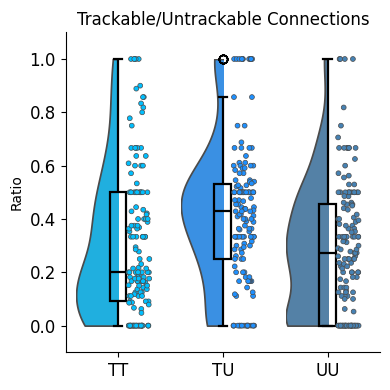

In [92]:
# plot boxplot for the three conditions and calculate p value 
from scipy.stats import ttest_ind
import matplotlib.patches as mpatches
# add p value
p_tt_tu = ttest_ind(tt_ratio, tu_ratio).pvalue
p_tt_uu = ttest_ind(tt_ratio, uu_ratio).pvalue
p_tu_uu = ttest_ind(tu_ratio, uu_ratio).pvalue
print(p_tt_tu, p_tt_uu, p_tu_uu)

fig, axs = plt.subplots(figsize=(4, 4))
data = {"tt": tt_ratio, "tu": tu_ratio, "uu": uu_ratio}
new_color = ["deepskyblue", "dodgerblue", "steelblue"]
df = pd.DataFrame(data)
print(df)
sns.violinplot(df, cut=0, palette=new_color, inner=None, ax=axs)
for violin in axs.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=axs.transData))
# show dots for the data points
bpl = sns.boxplot(data=df, showfliers=True, gap=0.8, width=0.8, legend=False,
                        boxprops={'zorder': 3, 'facecolor': 'none'},
                        linewidth=1.6, palette='dark:k', ax=axs)  
# Plot stripplot
old_len_collections = len(axs.collections)
sns.stripplot(data=df, dodge=False, size=3.5, edgecolor='gray', linewidth=0.5,
                palette=new_color, legend=False, ax=axs)
for dots in axs.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.2, 0]))

axs.set_ylabel("Ratio")
axs.set_xticklabels(["TT", "TU", "UU"])
axs.tick_params(axis='both', which='major', labelsize=12)
# remove the top and right spines
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

axs.set_title("Trackable/Untrackable Connections")
axs.set_ylim(-0.1, 1.1)
# add p value to the plot
# x1, x2 = 1, 2
# y, h, col = 0.8, 0.05, 'k'
# axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# axs.text((x1+x2)*.5, y+h, "p = {:.2e}".format(p_tt_tu), ha='center', va='bottom', color=col)
# x1, x2 = 1, 3
# y, h, col = 0.85, 0.05, 'k'
# axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# axs.text((x1+x2)*.5, y+h, "p = {:.2e}".format(p_tt_uu), ha='center', va='bottom', color=col)
# x1, x2 = 2, 3
# y, h, col = 0.9, 0.05, 'k'
# axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# axs.text((x1+x2)*.5, y+h, "p = {:.2e}".format(p_tu_uu), ha='center', va='bottom', color=col)
plt.tight_layout()
plt.savefig(f"{figure_save_to}/trackable_units/trackable_untrackable_connection_ratio.png", dpi=300)
plt.savefig(f"{figure_save_to}/trackable_units/trackable_untrackable_connection_ratio.pdf", dpi=300)
plt.show()


In [85]:
# # plot the trackable connections to time 
# fig, axs = plt.subplots(1, 1, figsize=(10, 3))
# # smooth the data using a moving average
# # window = 5
# # tt_ratio_sm = np.convolve(tt_ratio, np.ones(window), 'same') / window
# # tu_ratio_sm = np.convolve(tu_ratio, np.ones(window), 'same') / window
# # uu_ratio_sm = np.convolve(uu_ratio, np.ones(window), 'same') / window
# # ts_conn = ts_conn[window//2:-window//2]

# # axs.scatter(ts_conn, tt_ratio_sm, label="TT", color="blue")
# axs.scatter(ts_conn, tt_ratio, label="TT", color="blue", alpha=0.7, s=10)
# # plot regression line 
# x = np.array([i.timestamp() for i in ts_conn])
# y = np.array(tt_ratio)
# m, b = np.polyfit(x, y, 1)
# x_datetime = [datetime.fromtimestamp(i) for i in x]
# axs.plot(x_datetime, m*x + b, color="blue")

# # axs.scatter(ts_conn, tu_ratio_sm, label="TU", color="green")
# axs.scatter(ts_conn, tu_ratio, label="TU", color="green", alpha=0.7, s=10)
# # plot regression line
# y = np.array(tu_ratio)
# m, b = np.polyfit(x, y, 1)
# axs.plot(x_datetime, m*x + b, color="green")

# # axs.scatter(ts_conn, uu_ratio_sm, label="UU", color="red")
# axs.scatter(ts_conn, uu_ratio, label="UU", color="red", alpha=0.7, s=10)
# # plot regression line
# y = np.array(uu_ratio)
# m, b = np.polyfit(x, y, 1)
# axs.plot(x_datetime, m*x + b, color="red")

# axs.legend()

# axs.set_xlabel("Timestamp", fontsize=12)
# axs.set_ylabel("Ratio", fontsize=12)
# axs.set_ylim(-0.2, 1.2)
# plt.tight_layout()

# plt.show()

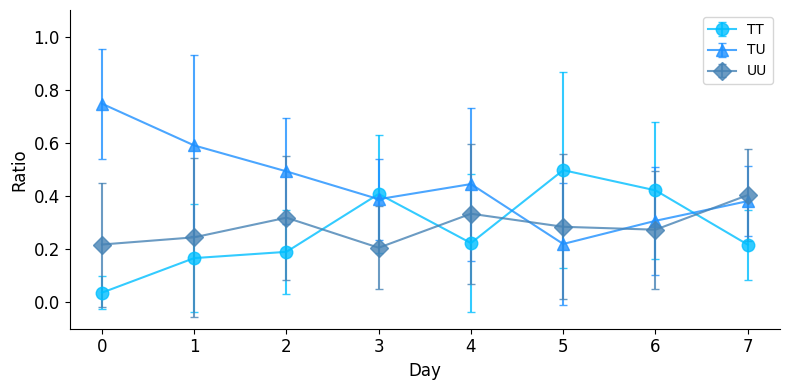

In [117]:
# group the trackable ratio by day
day_tt_ratio, day_tu_ratio, day_uu_ratio = [], [], []
day_ts_conn = []
for t, tt, tu, uu in zip(ts_conn, tt_ratio, tu_ratio, uu_ratio):
    day = t.date()
    if day not in day_ts_conn:
        day_ts_conn.append(day)
        day_tt_ratio.append([tt])
        day_tu_ratio.append([tu])
        day_uu_ratio.append([uu])
    else:
        index = day_ts_conn.index(day)
        day_tt_ratio[index].append(tt)
        day_tu_ratio[index].append(tu)
        day_uu_ratio[index].append(uu)

day_tt_mean = [np.mean(r) for r in day_tt_ratio]
day_tu_mean = [np.mean(r) for r in day_tu_ratio]
day_uu_mean = [np.mean(r) for r in day_uu_ratio]

day_tt_std = [np.std(r) for r in day_tt_ratio]
day_tu_std = [np.std(r) for r in day_tu_ratio]
day_uu_std = [np.std(r) for r in day_uu_ratio]


# Reset to matplotlib defaults
sns.reset_orig()

# Or if you want to reset just seaborn
sns.reset_defaults()
# Create the figure with the new styling
fig, ax = plt.subplots(figsize=(8, 4))


# Define colors
colors = ["deepskyblue", "dodgerblue", "steelblue"]

# Plot with error bars
ax.errorbar(day_ts_conn, day_tt_mean, yerr=day_tt_std, label="TT", 
            color=colors[0], alpha=0.8, capsize=3, marker='o', markersize=9, linewidth=1.5)
ax.errorbar(day_ts_conn, day_tu_mean, yerr=day_tu_std, label="TU", 
            color=colors[1], alpha=0.8, capsize=3, marker='^', markersize=9, linewidth=1.5)
ax.errorbar(day_ts_conn, day_uu_mean, yerr=day_uu_std, label="UU", 
            color=colors[2], alpha=0.8, capsize=3, marker='D', markersize=9, linewidth=1.5)

# Customize the plot
# ax.legend(frameon=True, fancybox=True, shadow=True)
ax.set_xlabel("Day", fontsize=12)
# set x-axis to number 
ax.set_xticks(day_ts_conn)
ax.set_xticklabels([i for i in range(len(day_ts_conn))])
ax.set_ylabel("Ratio", fontsize=12)
ax.set_ylim(-0.1, 1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.savefig(f"{figure_save_to}/trackable_units/trackable_untrackable_connection_ratio_day.png", dpi=300)
plt.savefig(f"{figure_save_to}/trackable_units/trackable_untrackable_connection_ratio_day.pdf", dpi=300)

plt.show()

#### Analyze connectivity change over time for trackable units

In [51]:
def find_new_connections(connect_1, connect_2):
    new_connections = []
    if len(connect_1) == 0:
        return connect_2
    elif len(connect_2) == 0:
        return []
    else:
        for i in range(len(connect_2)):
            if connect_2[i] not in connect_1:
                new_connections.append(connect_2[i])
    return new_connections

def find_lost_connections(connect_1, connect_2):
    lost_connections = []
    if len(connect_2) == 0:
        return connect_1
    elif len(connect_1) == 0:
        return []
    else:
        for i in range(len(connect_1)):
            if connect_1[i] not in connect_2:
                lost_connections.append(connect_1[i])
    return lost_connections

In [61]:
def analyze_connection_changes(graph: nx.Graph, trackable_units: List[Dict]):
    conn_changes = {}
    for track_id, unit in enumerate(trackable_units):
        conn_changes[track_id] = {}
        indices = unit['indices']
        start_time, end_time = unit['start_time'], unit['end_time']
        
        # Extract adjacency matrices for unit nodes over time
        connections_by_time = {}
        for node in indices:
            timestamp = graph.nodes[node]['timestamp']
            if timestamp not in connections_by_time:
                connections_by_time[timestamp] = {}
            # else:
                # print(f"Duplicate timestamp {timestamp} found for node {node}")
            # print(graph.nodes[node]['connection'].dtype)
            connection = graph.nodes[node]['connection']
            if isinstance(connection, np.ndarray):
                if connection.ndim == 0:  # 0-d array (scalar)
                    connections_by_time[timestamp] = [connection.item()]
                else:  # Multi-dimensional array
                    connections_by_time[timestamp] = connection.tolist()
            elif isinstance(connection, (float, int)):  # Scalar value
                connections_by_time[timestamp] = [connection]
            elif isinstance(connection, (list, set, tuple)):  # Iterable
                connections_by_time[timestamp] = list(connection)
            else:
                raise TypeError(f"Unsupported data type for connection: {type(connection)}")
        conn_changes[track_id] = connections_by_time


        # #     connections_by_time[timestamp] = list(graph.nodes[node]['connection'])
        # # print(connections_by_time)
        
        # # Compare connections across timestamps
        # time_sorted = sorted(connections_by_time.keys())
        # for t1, t2 in zip(time_sorted[:-1], time_sorted[1:]):
        #     print(f"compare {t1} and {t2}")
        #     # print(connections_by_time[t1], connections_by_time[t2])
        #     conn_changes[track_id].append({
        #         # 'unit': unit,
        #         'time1': t1,
        #         'time2': t2,
        #         'number_connections': len(connections_by_time[t1]),
        #         'new_connections': find_new_connections(connections_by_time[t1], connections_by_time[t2]),
        #         'lost_connections': find_lost_connections(connections_by_time[t1], connections_by_time[t2]),
        #         # 'weight_changes': find_weight_changes(connections_by_time[t1], connections_by_time[t2]),
        #     })
    return conn_changes

In [62]:
conn_changes = analyze_connection_changes(tracker.graph, trackable_units)

In [63]:
conn_changes

{0: {Timestamp('2023-09-22 18:00:00'): [],
  Timestamp('2023-09-20 16:00:00'): [],
  Timestamp('2023-09-21 18:00:00'): [],
  Timestamp('2023-09-18 21:00:00'): [1020.0],
  Timestamp('2023-09-22 19:00:01'): [],
  Timestamp('2023-09-21 19:00:00'): [],
  Timestamp('2023-09-19 20:00:00'): [],
  Timestamp('2023-09-21 20:00:00'): [],
  Timestamp('2023-09-18 23:00:00'): [1065.0, 1069.0, 1075.0, 1076.0],
  Timestamp('2023-09-22 20:00:00'): [3128.0],
  Timestamp('2023-09-20 18:00:00'): [],
  Timestamp('2023-09-22 21:00:01'): [3134.0, 3135.0],
  Timestamp('2023-09-19 00:00:01'): [1096.0],
  Timestamp('2023-09-19 01:00:01'): [1103.0, 1105.0],
  Timestamp('2023-09-19 22:00:00'): [1625.0, 1628.0, 1632.0, 1637.0],
  Timestamp('2023-09-21 22:00:01'): [],
  Timestamp('2023-09-22 22:00:01'): [3154.0],
  Timestamp('2023-09-20 20:00:00'): [],
  Timestamp('2023-09-19 02:00:00'): [1121.0],
  Timestamp('2023-09-22 23:00:00'): [],
  Timestamp('2023-09-17 03:00:00'): [],
  Timestamp('2023-09-19 03:00:00'): [],

In [65]:
# connectivity change over time for each tackable unit
for track_id, conn in conn_changes.items():
    fig, axs = plt.subplots(1, 1, figsize=(10, 3))
    timestamps = list(conn.keys())
    # sort timestamps 
    timestamps = sorted(timestamps)
    num_connections = [len(conn[ts]) for ts in timestamps]
    axs.plot(timestamps, num_connections, marker='o', linestyle='-', color='b')
    axs.set_title(f"Trackable Unit {track_id} Connectivity Changes")
    axs.set_xlabel("Time")
    axs.set_ylabel("Number of Connections")
    plt.savefig(f"{figure_save_to}/trackable_unit_{track_id}_connectivity_changes.png", dpi=300)
    plt.savefig(f"{figure_save_to}/trackable_unit_{track_id}_connectivity_changes.pdf", dpi=300)
    plt.close()